# Ch5. Chains - 여러 프로세스를 통합

### 01. 다중 처리를 할 수 있다.

Chains는 일련의 과정을 정리할 수 있다.

① 여러 모듈의 조합을 쉽게 할 수 있다.
  - LLMChain: PromptTemplate와 Chat models를 한번에 처리
  - ConversationChain: Memory 모듈, Langchain의 다른 모듈을 쉽게 조합

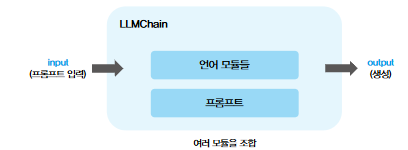

② 특정 용도에 특화된 체인</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;언어 모델의 호출만으로는 대응하기 어려운 기능이나 복잡한 처리를 랭체인 측에서 미리 내장해 특정 용도에 특화된 Chains 존재
  - LLMRequestsChain: 주어진 URL에 접속해 얻은 결과와 질문을 조합해 만든 프롬프트로 언어 모델을 호출

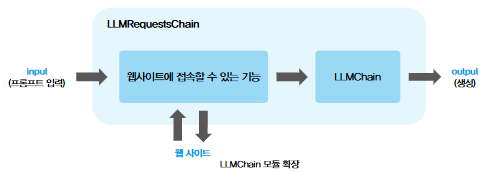

③ 체인 자체를 정리한다</br>
Chains 자체를 묶어 순서대로 실행하거나 필요에 따라 호출 가능</br>
LLMRequestsChain으로 웹페이지에서 얻은 정보 요약하고 다른 Chains로 처리

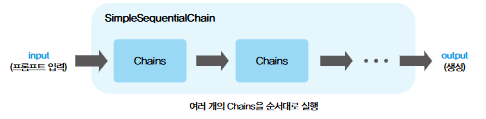

### 02. 여러 모듈을 쉽게 조합할 수 있는 Chains

##### LLMChain을 사용해 여러 모듈을 통합하는 방법

LLMChain은 여러 모듈을 쉽게 조합할 수 있는 Chain</br>
주로 PromptTemplate와 Chat models를 조합하는데 사용

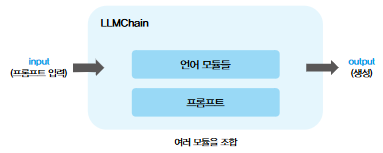

In [6]:
from langchain import LLMChain, PromptTemplate
from langchain.chat_models import ChatOpenAI
import os
import openai

In [42]:
api_key = os.getenv("OPENAI_API_KEY")

In [40]:
api_key = os.getenv('sk-...')

In [44]:
chat = ChatOpenAI(  
    model="gpt-3.5-turbo",
    openai_api_key = 'sk-...'
)

prompt = PromptTemplate(  
    template="{product}는 어느 회사에서 개발한 제품인가요?",  
    input_variables=[
        "product"  
    ]
)

chain = LLMChain( #← LLMChain을 생성
    llm=chat,
    prompt=prompt,
)

chain = ( #← LLMChain을 생성
    prompt |
    chat
)

result = chain.predict(product="iPhone") #← LLMChain을 실행

print(result)

iPhone은 Apple Inc.에서 개발한 제품입니다.


##### ConversationChain으로 기억을 가진 애플리케이션 개발이 쉬워진다

ConversationChain은 Memory 모듈과 다른 모듈을 쉽게 조합

In [53]:
from langchain.chains import ConversationChain
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationBufferMemory

chat = ChatOpenAI(
    api_key = 'sk-...')

memory = ConversationBufferMemory(return_messages=True)

chain = ConversationChain(
    memory=memory, #← Memory 모듈을 지정
    llm=chat, #← 언어 모델을 지정
)

result = chain.predict(input="hi") 
print(result)

Hello! How are you today?


In [56]:
chain = LLMChain(
    llm=chat,
    prompt=prompt,
    verbose=True
)
result = chain.predict(product="갤럭시") 
print(result)



> Entering new LLMChain chain...
Prompt after formatting:
갤럭시는 어느 회사에서 개발한 제품인가요?

> Finished chain.
삼성전자에서 개발한 갤럭시 제품군은 안드로이드 운영체제를 사용하는 스마트폰 및 태블릿 컴퓨터 시리즈입니다.


verbose로 로그 출력 확인 가능

### 03. 특정 기능에 특화된 Chains

##### 특정 URL에 접속해 정보를 얻게 하는 방법

언어 모델은 학습된 지식 외의 정보를 기반으로한 답변 불가</br>
LLMRequestChain: URL에서 정보를 가져와 그 정보를 바탕으로 답변 생성

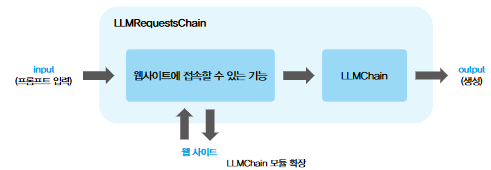

In [59]:
from langchain.chains import LLMChain, LLMRequestsChain
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate

chat = ChatOpenAI(
    api_key = 'sk-...')

prompt = PromptTemplate( 
    input_variables=["query",
                     "requests_result"],
    template="""아래 문장을 바탕으로 질문에 답해 주세요.
문장: {requests_result}
질문: {query}""",
)

llm_chain = LLMChain(
    llm=chat,
    prompt=prompt,
    verbose=True,
)

chain = LLMRequestsChain(  
    llm_chain=llm_chain,  #← llm_chain에 LLMChain을 지정
)

print(chain({
    "query": "서울의 날씨를 알려주세요",
    # "url": "https://www.jma.go.jp/bosai/forecast/data/overview_forecast/130000.json",
    "url": "https://www.data.go.kr/data/15084084/openapi.do",
}))



> Entering new LLMChain chain...
Prompt after formatting:
아래 문장을 바탕으로 질문에 답해 주세요.
문장: 
















기상청_단기예보 ((구)_동네예보) 조회서비스 | 공공데이터포털














 
 
 
 
 
 
 
 
 
 
 

 
 
 







콘텐츠 바로가기









이 누리집은 대한민국
                            공식 전자정부 누리집입니다.
                        



검색
                        

                            자동완성 기능자동완성 기능
                        




공공데이터포털
메뉴보기

공공데이터포털




로그인
회원가입



사이트맵
ENGLISH






데이터찾기


데이터찾기

데이터목록
국가중점데이터
이슈 및 추천데이터





국가데이터맵


국가데이터맵






데이터요청


데이터요청

공공데이터 제공신청
분쟁조정 신청





데이터활용


데이터활용

공공데이터 시각화
국민참여지도
위치정보 시각화
공공데이터 활용사례
공공데이터 우수사례





정보공유


정보공유

개발자 네트워크
데이터 공유하기
공지사항
자료실
문의하기
포털뉴스





이용안내


이용안내

공공데이터 이용가이드
공공데이터포털 소개
공공데이터 정책
공공데이터 품질관리









데이터찾기



데이터목록
국가중점데이터
이슈 및 추천데이터





데이터요청



공공데이터 제공신청
분쟁조정 신청





데이터활용



공공데이터 시각화
국민참여지도
위치정보 시각화
공공데이터 활용사례
공공데이터 우수사례





정보공유



개발자 네트워크
데이터 공유하기
공지사항
자료실
문의하기
포털뉴스





이용안내



공공데이터 이용가이드
공공데이터포털 소개
공공데이터 정책
공공데이터 품질관리







메뉴보기










URL을 브라우저에서 열면 JSON 형식으로 전달되는데 특별한 처리 없이 정보를 가져올 수 있음

### 04. Chains 자체 정리하기

##### Chains 자체를 순서대로 실행하는 SimpleSequentialChain

한 번의 호출로 여러 작업 실행

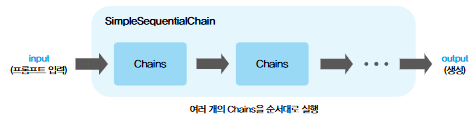

In [60]:
from langchain.chains import LLMChain, SimpleSequentialChain
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate

chat = ChatOpenAI(model="gpt-3.5-turbo",
                  api_key = 'sk-...')

write_article_chain = LLMChain( #← 기사를 쓰는 LLMChain 만들기
    llm=chat,
    prompt=PromptTemplate(
        template="{input}에 관한 기사를 써주세요.",
        input_variables=["input"],
    ),
)

translate_chain = LLMChain( #← 번역하는 LLMChain을 생성
    llm=chat,
    prompt=PromptTemplate(
        template="다음 문장을 영어로 번역해 주세요.\n{input}",
        input_variables=["input"],
    ),
)

sequential_chain = SimpleSequentialChain( #← SimpleSequentialChain을 생성
    chains=[ #← 실행할 Chain을 지정
        write_article_chain,
        translate_chain,
    ]
)

result = sequential_chain.run("일렉트릭 기타 선택 방법")

print(result)

Choosing an electric guitar is a very important decision. There are various models and brands of electric guitars that can create different styles and sounds, so it is very important to choose the guitar that is most suitable for you. Below are some tips on how to choose an electric guitar.

First, set a budget. The price range of electric guitars varies greatly. Setting a budget and finding a guitar that fits within that budget is important.

Second, consider your musical tastes and style. Depending on the genre you want to play and the sound you want, you should choose the model and specifications of the guitar accordingly.

Third, try out several guitars yourself. Going to a store and trying out various guitars yourself is the most important step. Compare different guitars to find the one that suits you best and make your selection.

Fourth, consider the reliability of the brand and manufacturer. Since electric guitars are products that can be used for a long time, it is important t